## Artificail Neuron

### Biological Neuron

#### Biological neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemilcal and electical signals

![nuron](./atneuron.png)

#### Neurons are like simple logic gate with binary outputs. Multiple signals arrive at the dendrites, they are then integrated into the cell body and if the accumulated signal exceeds a certain threshold an output signal is generated

#### By this  we can define are artificial neurons. We can take certain input values $x$ and a corresponding weight $w$ and takes the linear combination of these to determine whether the overall summation is enough to fire a signal just like biological neuron.

### $\phi(z)=x_1w_1+x_2w_2+x_3w_3+\dots+x_mw_m$

#### In the form of matrix we can write it as dot product of the input and weight matrix

### $w=\begin{bmatrix}w_1 \\ w_2\\ \vdots\\  w_m\end{bmatrix}x=\begin{bmatrix}x_1 \\ x_2\\ \vdots\\  x_m\end{bmatrix}$

#### If the net input of $X^{(i)}$ is greater than a defined threshold $\theta$ we predict $1$ otherwise $-1$.

### $\phi(z)=1$  if $z>=\theta $

### $\phi(z)=-1$  otherwise


### $w_0=-\theta \\ x_0=1\\z=w_0x_0+w_1x_1+\dots+w_mx_m= \textbf{w}^T \textbf{x}$

### $\phi(z)=1$  if $z>=0 $

### $\phi(z)=-1$  otherwise


### weight $w_0=-\theta$ is called as **Bias Unit**

### This following figure illustrate how perceptron help in binary classification. The left figure is demonstrate the **Unit Step** function. It determines wheather based on  linear combination of input along with weight enough to fire the neuron.

![perceptro](./perceptronrule.png)

##  Basic Components of Perceptron


#### **Input Layer:** The input layer consists of one or more input neurons, which receive input signals from the external world or from other layers of the neural network.We feed the features of a sample as input. Then we check if the weight we have now is able to detect the actual output or not. If not then we do further processing.
#### **Weights:** Each input neuron is associated with a weight, which represents the strength of the connection between the input neuron and the output neuron.
#### **Bias:** A bias term is added to the input layer to provide the perceptron with additional flexibility in modeling complex patterns in the input data.
#### **Activation Function:** The activation function determines the output of the perceptron based on the weighted sum of the inputs and the bias term. Common activation functions used in perceptrons include the step function, sigmoid function, and ReLU function.
#### **Output:** The output of the perceptron is a single binary value, either 0 or 1, which indicates the class or category to which the input data belongs.
#### **Training Algorithm:** The perceptron is typically trained using a supervised learning algorithm such as the perceptron learning algorithm or backpropagation. During training, the weights and biases of the perceptron are adjusted to minimize the error between the predicted output and the true output for a given set of training examples.


## The perceptron learning rule

#### Perceptron algorithm follows :
### 1. Initialize the weights to 0 or small random numbers.
### 2. For each training sample $x^i$:
### a.Compute the predicted output value $\hat{y}$
###     b. Update the weights


#### The idea of the Perceptron rule is that of computing the difference between current and updated weight corresponding to the jth variable as the following

### $ w_j $:=$ w_j+\Delta w_j$
### $\Delta w_j=\eta * x_j(y^i-\hat{y}^i)$

#### Here $y^i$ is the acutal class label of $i^{th}$ sample and $\hat{y}^i$ is the predicted class label of $i^{th}$ sample. And $ w_j $ is the weight value of $j^{th}$ feature of the $i^{th}$ sample and $x_j$ is the feature value of $j^{th}$ feature in $i^{th}$ sample
#### All weights in the weight vector are begin updated simultaneously for a predicted output class , so we do not need to recompute the predicted class. 
### $\Delta w_0=\eta(y^i-\hat{y}^i)*x_0^i$
### $\Delta w_1=\eta(y^i-\hat{y}^i)*x_1^i$
### $\Delta w_2=\eta(y^i-\hat{y}^i)*x_2^i$


#### $\eta$ is a hyperparameter and it has to be set prior to the training procedure to a value between 0 and 1. As with any other hyperparameters it is not updated via the optimization rule. But it can be tuned via various tehniques such as cross-validation and grid-search

## Let's concretely implement a Perceptron training and updating procedure
![dataset](./pecep1.png)

#### For a generic observation i, the architecture of the perceptron will be of the following fashion:

![1st-neuron](./percep01.png)

#### learning rate $\theta =0.5$ We first randomly initialize the weights and compute the fitted value of the first observation, then see if it matches the actual value:


![input](./percep2.png)

#### Since in this case the actual value is 1 while the fitted value is 0, we need to update our weights. To do so, we follow the perceptron training rule and compute the difference in weights as follow 

![3rd](./percep3.png)

![2ndsample](./percep4.png)

#### Note that, for the purpose of this excercise, I set the learning rate to a relatively high value (0.5), which means that the algorithm makes significant updates in weights.

#### Now let’s work on the second observation:

![2ndsample](./percep5.png)

#### Perceptron mis-classified the observation at its first attempt, hence we need to update weights once more.

![equ1](./percep6.png)

![adsa](./percep7.png)

#### And  F(0.725)=1still misclassified! In this case, we need more than 1 update for the second observation:

![ashdas](./percep8.png)

 #### It might happen that, if we update the weights also for the second (and, in this case, last) observation, we might face a situation where the first observation, with these new values, is no longer correctly classified. If this is the case, we need to repeat the updating procedure once more on the whole dataset, until all the observations are correctly classified.

#### **It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small**

![general](./generalperceptron.png)

## An object-oriented perceptron API

In [1]:
import numpy as np

In [96]:
class Perceptron(object):

    def __init__(self,eta=0.1,n_iter=50,random_state=1):

        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=.01,size=1+X.shape[1])
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                update=self.eta*(target-self.predict(xi))

                self.w_[1:]+=update*xi 
                # print(self.w_[1:])
                self.w_[0]+=update
                errors+=int(update!=0.0)
            
            self.errors_.append(errors)
        print(self.w_[1:])
        return self


    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]

    def predict(self,X):

        return np.where(self.net_input(X)>=0.0,1,-1) 

In [7]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')

In [10]:
df=pd.read_csv(s,header=None,
encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
import matplotlib.pyplot as plt

y=df.iloc[0:100,4].values


In [87]:
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [88]:
X=df.iloc[0:100,[0,2]].values
X
# X.head()

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

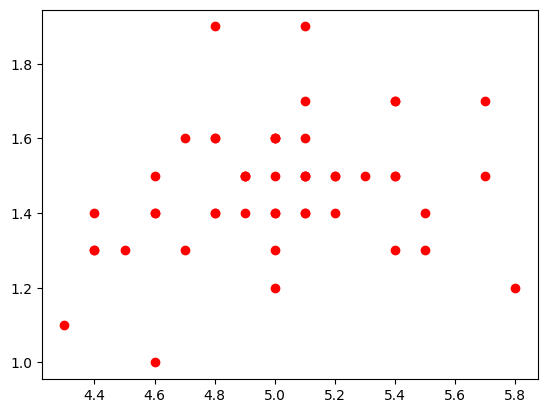

In [53]:
plt.scatter(X.iloc[:50,0],X.iloc[:50,1],color='red',marker='o', label='setosa')

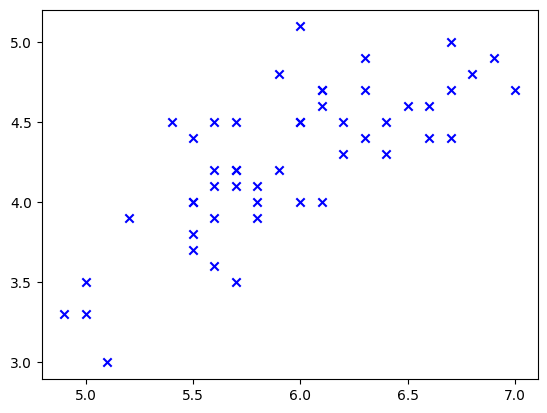

In [39]:
plt.scatter(X.iloc[50:100, 0], X.iloc[50:100, 1],color='blue', marker='x', label='versicolor')

[-0.70611756  1.83471828]


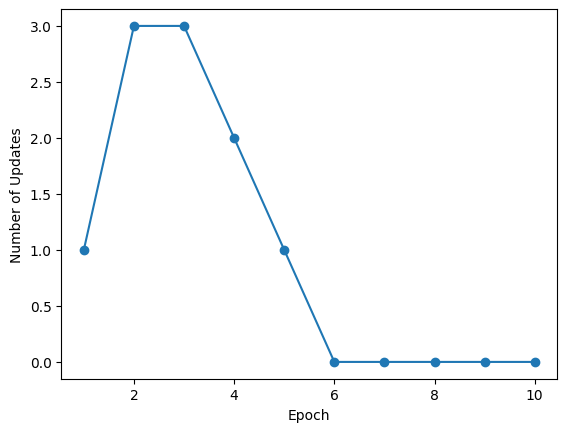

In [97]:
ppn=Perceptron(eta=.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Updates')
plt.show()

In [62]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
# plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

/tmp/ipykernel_27748/859351717.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')


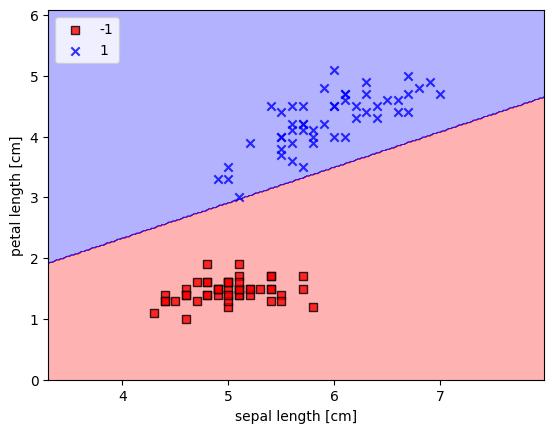

In [63]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()